In [54]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

In [55]:
# Define the broken power law function
def broken_power_law(t, A, t0, alpha, beta):
    y = np.piecewise(t, [t < t0, t >= t0],
                     [lambda t: A * (t/t0)**alpha, lambda t: A * (t/t0)**beta])
    return y

In [56]:
# Generate simulated supernova light curve data
t_data = np.linspace(0, 100, 100)
A_true = 1.0
t0_true = 50.0
alpha_true = 2.5
beta_true = -0.8
y_true = broken_power_law(t_data, A_true, t0_true, alpha_true, beta_true)
y_data = y_true + np.random.normal(size=len(t_data), scale=0.2)  # Add Gaussian noise

In [57]:
# Define the model using lmfit
model = Model(broken_power_law)
params = model.make_params(A=1, t0=50, alpha=2, beta=-1)

In [58]:
# Perform the fitting
result = model.fit(y_data, params, t=t_data)

In [59]:
# Print the fitting results
print(result.fit_report())

[[Model]]
    Model(broken_power_law)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 100
    # variables        = 4
    chi-square         = 4.58172012
    reduced chi-square = 0.04772625
    Akaike info crit   = -300.309569
    Bayesian info crit = -289.888888
    R-squared          = 0.61863630
[[Variables]]
    A:      0.92963144 +/- 0.06367896 (6.85%) (init = 1)
    t0:     52.7676710 +/- 2.48189381 (4.70%) (init = 50)
    alpha:  2.07175230 +/- 0.37466906 (18.08%) (init = 2)
    beta:  -0.75836728 +/- 0.23978763 (31.62%) (init = -1)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, beta)   = -0.7870
    C(t0, beta)  = -0.5532
    C(t0, alpha) = -0.5337
    C(A, t0)     = +0.2875
    C(A, alpha)  = +0.2779


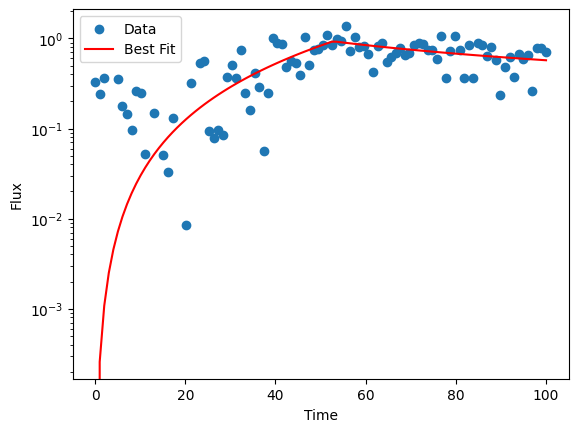

In [60]:
# Plot the data and fitted curve
plt.scatter(t_data, y_data, label='Data')
plt.plot(t_data, result.best_fit, 'r-', label='Best Fit')
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.legend()
plt.show()